<a href="https://colab.research.google.com/github/Akhilaaj/Akhilaaj/blob/main/NN_ImageClassification_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as pd
import tensorflow

In [6]:
! mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [4]:
import kaggle

OSError: ignored

In [11]:

a=[i for i in range(5)]

In [12]:
a

[0, 1, 2, 3, 4]

In [14]:
type(i for i in range(5))

generator

In [15]:
<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAL8AAAB/CAMAAACJ3OOAAAAA+VBMVEX////M7P/M/8z//5leXl4AAAD8/Pz39/doaGjx8fGHh4fu7u5lZWXS8//N7v+VlZXl5eW4uLjExMSOjo7U1NR8fHxycnKurq7MzMydnZ3a2tq+vr6np6fb/f9tbW3T/9PW+P85OThLTE1NXmOKoqzA3+wAAA+ivMpVU1I3QUZ3jZkeJi2mwco6SlO209tGU1swMDAmMjoiIiKVrry20+NneoQbFxUUKRRFX0UmPiYnKieFpoW9572s0qw7TjsdJx1rimtBSEGXvJdgfWApMykoIigwMCNeXieAgENISBZFRVBtbTvg4Im/v3IqKhehoVkrKwBUVC9NTTyUOk7jAAAHHUlEQVR4nO1ca3vTNhhVW98i25F8v6lukxAIKbQObaBlhXWwMbbBGPv/P2a+x3Zc6qRxHO3J+dCGOCVH8ns7r2QBsMcee+xRC+zirik8AtZkMBhMrK5prAlxOLqSj+Wr0VDsmso64CdPZPng4ECWn0z4rsmsATQ/PkhwPEddk1kd3GzcT/n3z8+4rumsDHfUz/n3R27XdFaGNZcPMshzr2s6q8J6XeI/oSsN9OAr6+U45z+euUava04rAEsK5JjL7AbIlwxwza5JNYfqi4IIXHacDEAes6H72gYtMQgiQNTwt/r02bEsy8fPnkb/AkTrmFcziL4HdBi/1CfPp0+mzyd6csUhHdJqCt0M2fpptOFUQoia2w3c/ShqmSFbpNZf5Iwdj6Kc5oQ/U+upuy7t9ACwFFu6fz9JV9rhNGAns+v8yMpdYWdLaUeLqenGDz+l/vhyZxCNRCZy5gNiy9tJLYB9O3nhKA99lOygHlbM1KwfsJ4Y2oND3DZgVhrwRgOpzvt6q2xWBTbt7CVpNLUcs0tyzBZyNvdnrjLEHUoDlpFHdN6vWA9HpIlEaupmbO5IMd2DhaLSqdQ9JJhfvricz2rqziZ+vgX0mAJlLJUvOrMrOcLVzFn+S2sX1IDqF+yYZ8oXlbPjpIHSPz6rcWun+zwGtaIVVzIXN3mR698Xkxpzhx2nAdEsFWq4EnvEl/28/9B/WZcWjE7TQCy0FuCZSkhU5gX+cxvUwOxQDeQVQwpnwZAXXcuYvCr1r4ZqXRRluoqiPKqElCweijZxNIhsDJWLwvxfYGLUiEpcvWltQcSl2RalKpnobvAqZAxiu70ok7kgOF/0nwMOYOQvS5etqAHXeHN9fTNYWIBdlbGcgRRk+lb2dqyylIvTNH6eXsShRpScJTf22k8D6tufbg8Pb9+999M3ECxNJHZMSfBsvLBll4l4csxUlvv9vixPMzu3haXan7TdFFJ/Pjw5jHByF7cwe2bOQdRVYjBQ54WSGXtZIjNnl+dX55ezQuvTkqqRCG08DVgl4x58SOiHA3ivLoSWqEJDI5YdzTQqcfIWkcmGw+EQlq5iVGkCcUZtbH0EVDZwcn+1rw8znLwzgecDDruexpgW5jOrKNmwVXJJjl8KkaLvlG7XxuUMP2FZ1iSJr8GfTvIB3P6CGII0hJTSFApFryTawzFdNUpGLzIbWV9VGSFFwEYIYjsXPhT4v2c1G4sVglrx/js1peYyeEUozvmG5QzPhOwHMImXRmn+WclRKrGzZD2oaW+B12BBQ25WDbgsO/QylsrHAn8fBrpqlAofrqC5OHhP47b2W4xCwac2FJ6N4KDi7fz1NvffawUIofTuIYHYmX8Xes28v1ok0QUrj1SkNTVAbk7S+P9hwAFVi4IlZxMTxoO0FxPHS6vGEV5ZZIP21AC6eXcYDuH27rdotjRdS8p+bPgKFhfLinidpkjBDerqu83AGl7f3X18o8VUOZPPJDuvECbvI+A1W/suTKsRzmytKcS7VpJoI6hoESRtTZegHo3LXX9lwmWUeAQ9fzvFNNSBk1h9L5p97ITlvv6o5WkrWRjDwnYGEIqOpEhAiSfw2HiNqlktAe/aboMFC5HEUtL283c4bOttjUZHSZGWdwvDIl43DGsp/GB4NpqPzmAD08ImwlFhkcwCb336/fPnP5iWXNoIPU2VgJTOrBWPQ1Q1phwDcTAd9+X+eBo08Q3bD8MCSTzrz7++HIX4+ndLSwWRbBXZdHYKjShF0tQ8HePgPBZg/dPzRgMAiuDFTSRu+O0oxT/tDCCqeVw/8VmtVLG5CszKCzg9TfXv6bRZeSASXwzTo/c9o3/05VPpA1jbUMcF6bwUJlw3LHmWZqiHJlbotPysuH+m4aqjaKCJ63/J+R99Li9mBuywWj+uBV6KVJVo2sv0I6gIEm9U6J+MGn+pDgf/Fvh/K1emSlgZv4Le49dgvUQLD+4r9zF5W+5fMQ3hM+z3Av+vAogcIrs6jJUJW11nWBkrzv/BJuc/gN6j23bbs/9yCggKyuQRoD3+UB7/Kc+/tNc/lNef9NX/lOuv+/WvswH9q2kt6992+w95N7qt/gO5SRtw1PR/HFQsj1rtv+VBa5P9N5dlBwrF/c+k/2yo8RS31X+GG+8//3/6/9H6i2HRtv6y+O/ZgOSroRSufymlMLK0/pj46A6vP5ZB3/pvBZSvv1O//yH+apr3n9Rgnf0/NW66tf0/y6B7/xWgfv8b9fsPAe37PwH1+2+p3//cbP95sLv7z8HD+/8LInGBndn/D6h//oL6518A7c8fAeqf/6L++Tvqn38EtD9/Cqh//pf656+pf/4d0H7+AKD+/Afqz98AtJ9/Aqg/f4b683+Wz196Ttf5S4D2868A9eePUX/+G+3n79F+/iH150/Sfv4noP381Qh0n3+7xx57tIr/ADZq0fmenvYOAAAAAElFTkSuQmCC"/>

SyntaxError: ignored

In [18]:
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiMspjL_OJcNlEcxdpq8JaStPVar5lSuiFPs-ZNJ74MX7CJEHzEZ0pWtwgrC83sem9aGw&usqp=CAU"/>

SyntaxError: ignored

In [34]:
a=np.array([5,15,10,20,25])
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [22]:
s=StandardScaler()

In [29]:
s.fit(a.reshape(-1,1))

StandardScaler()

In [30]:
a


array([ 5, 15, 10, 20, 25])

In [32]:
s.transform(a.reshape(-1,1))

array([[-1.41421356],
       [ 0.        ],
       [-0.70710678],
       [ 0.70710678],
       [ 1.41421356]])

In [35]:
m=MinMaxScaler()

In [38]:
m.fit(a.reshape(-1,1))

MinMaxScaler()

In [40]:
m.transform(a.reshape(-1,1))

array([[0.  ],
       [0.5 ],
       [0.25],
       [0.75],
       [1.  ]])

In [41]:
print(s.mean_)

[15.]


In [42]:
m.mean_

AttributeError: ignored

In [208]:
x1=4
x2=5
#mx1+mx2==2*4+3*5
ya=23


In [209]:
w1=np.random.randint(1,100,1)[0]
w2=np.random.randint(1,100,1)[0]

In [210]:
yp=w1*x1+w2*x2
yp

589

In [211]:
e=(ya-yp)**2
e


320356

In [212]:
dedw=2*(ya-yp)*(-x1)
dedw2=2*(ya-yp)*(-x2)

In [213]:
w1=w1-dedw
w2=w2-dedw2

In [214]:
w1


-4457

In [215]:
error=[]
yp1=[]
for epoch in range(20):
  #yp=w1*x1+w2*x2
  dedw=2*(ya-yp)*(-x1)
  dedw2=2*(ya-yp)*(-x2)
  w1=w1-(0.01)*dedw
  w2=w2-(0.01)*dedw2
  yp=w1*x1+w2*x2
  error.append((ya-yp)**2)
  yp1.append(yp)

In [216]:
w1


15.780487804846267

In [217]:
w2

-8.02439024394261

In [218]:
ya

23

In [219]:
yp

22.999999999672013

In [220]:
e

320356

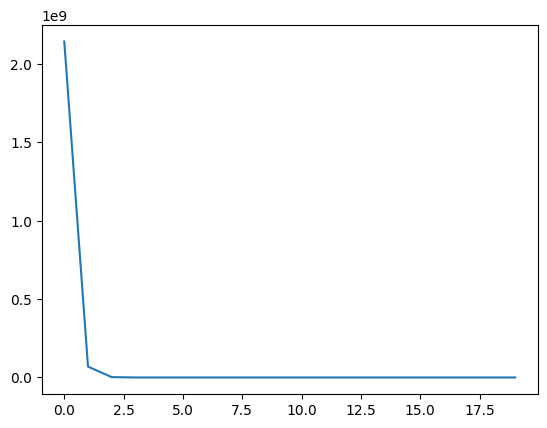

In [221]:
import matplotlib.pyplot as plt
plt.plot(error)

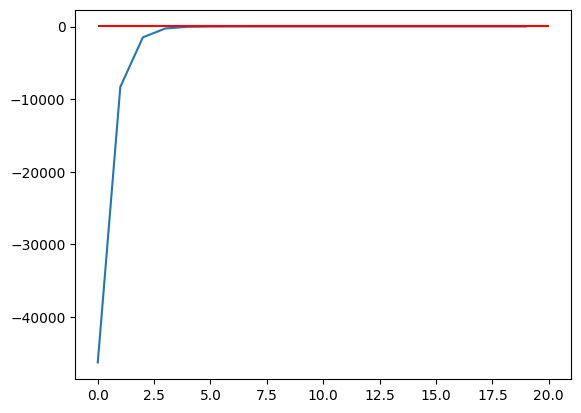

In [225]:
plt.plot(yp1)
plt.hlines(23, 0, 20, color = 'r')

In [226]:
pip install opencv


ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [229]:
!pip show opencv-python

Name: opencv-python
Version: 4.7.0.72
Summary: Wrapper package for OpenCV python bindings.
Home-page: https://github.com/opencv/opencv-python
Author: 
Author-email: 
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, numpy, numpy, numpy
Required-by: dopamine-rl, imgaug


In [230]:
pip install --upgrade opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 10.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.7.0.72
    Uninstalling opencv-python-4.7.0.72:
      Successfully uninstalled opencv-python-4.7.0.72


In [231]:
import cv2


In [347]:
img=cv2.imread("download.jpg")

In [235]:
type(img)

numpy.ndarray

In [237]:
img.shape

(225, 225, 3)

In [238]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [243]:
img.shape

(225, 225, 3)

In [244]:
225*225*3

151875

In [246]:
import matplotlib.pyplot as plt

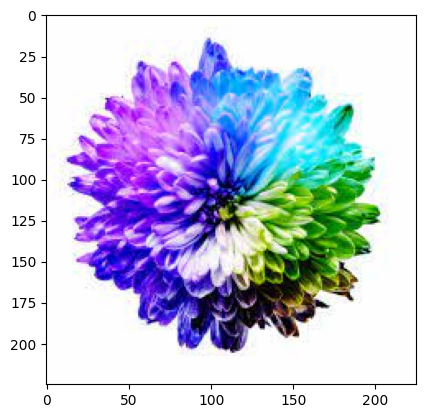

In [247]:
plt.imshow(img)

In [248]:
img.min()

0

In [249]:
img.max()

255

In [250]:
img

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

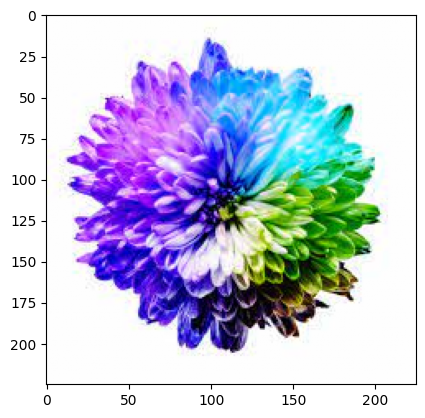

In [251]:
plt.imshow(img/255)

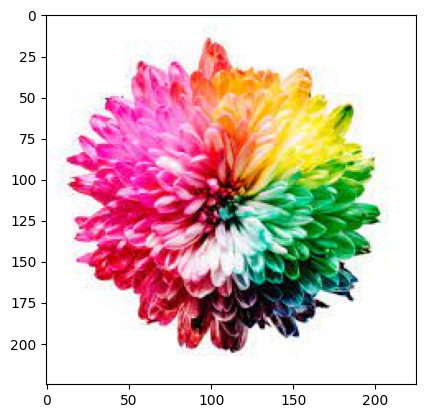

In [268]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

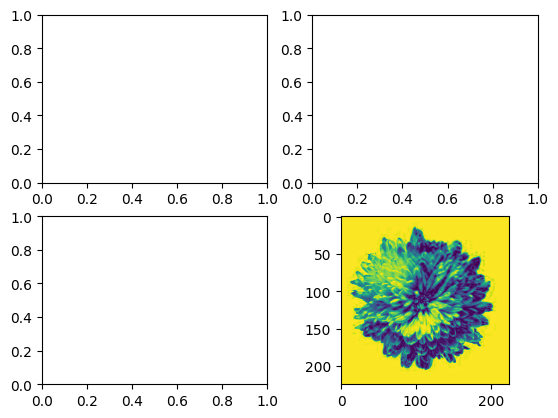

In [278]:
plt.subplots(2,2)
plt.imshow(img2[:,:,0])
plt.imshow(img2[:,:,1])
plt.imshow(img2[:,:,2])

In [279]:
img.shape

(225, 225, 3)

In [283]:
img[0:2].shape

(2, 225, 3)

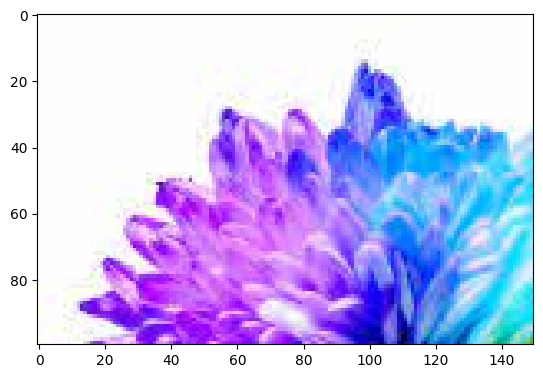

In [301]:
plt.imshow(img[:100,:150,:])

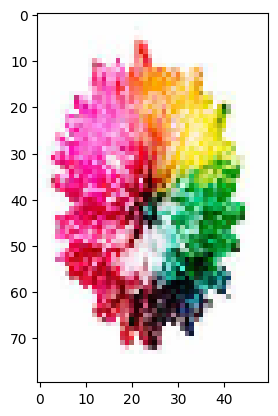

In [309]:
plt.imshow(cv2.resize(img2,(50,80)))

In [345]:
img[:200][:200][2]=234

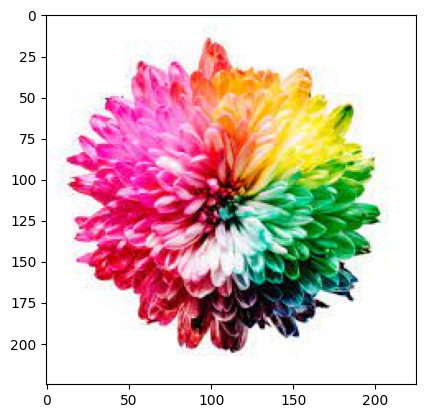

In [348]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

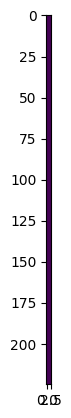

In [327]:
plt.imshow(img[:200][:200][2])

In [1]:
! pip show tensorflow

Name: tensorflow
Version: 2.12.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, jax, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.12.0'

In [9]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [11]:
type(x_train)

numpy.ndarray

In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [14]:
y_test.shape

(10000,)

In [15]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
print(f'',{x_train.shape},{x_test.shape},{y_train.shape},{y_test.shape})

 {(60000, 28, 28)} {(10000, 28, 28)} {(60000,)} {(10000,)}


In [22]:
print(f'',{x_train[0][0]},{x_test.shape},{y_train.shape},{y_test.shape})

TypeError: ignored

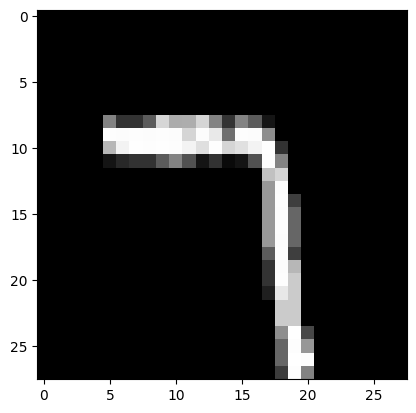

In [29]:
import matplotlib.pyplot as plt
plt.imshow(x_test[5999],cmap='gray')

In [51]:
import pandas as pd
pd.DataFrame(y_train).value_counts().sort_values()


5    5421
4    5842
8    5851
6    5918
0    5923
9    5949
2    5958
3    6131
7    6265
1    6742
dtype: int64

In [64]:
import numpy as np
def fun(dig):
  for i in range(dig):
    plt.imshow(y_train(dig))

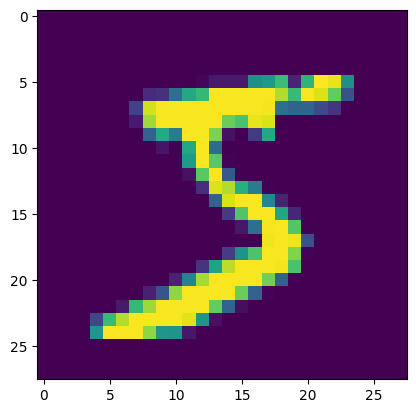

In [67]:
for i in range(4):
    a=np.where(y_train==0)
    plt.imshow(x_train[0])

In [73]:
a=np.where(y_train==0)[0]

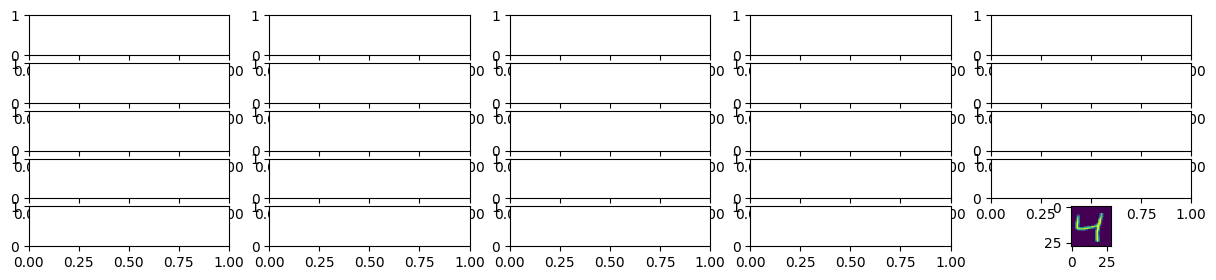

In [89]:
plt.subplots(5, 5, figsize=(15, 3))
plt.imshow(x_train[2])


Text(0.5, 1.0, 'Image 4')

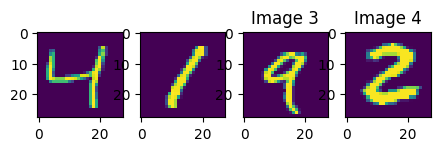

In [90]:
plt.subplot(1, 5, 1)
plt.imshow(x_train[2])
plt.subplot(1, 5, 2)
plt.imshow(x_train[3])
plt.subplot(1, 5, 3)
plt.imshow(x_train[4])
plt.title('Image 3')

plt.subplot(1, 5, 4)
plt.imshow(x_train[25])
plt.title('Image 4')

In [121]:
def plot(n):
  full=np.where(y_train==n)[0]
  a=np.random.choice(full,10)

  for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[a[i]])

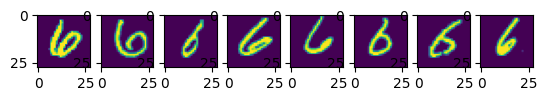

In [122]:
plot(6)

In [99]:
full=np.where(y_train==n)[0]
  a=np.random.choice(full,10)
  full
  a
  for i in range(10):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[a[i]])

array([    4,    19,    22, ..., 59973, 59990, 59992])

In [115]:
full=np.where(y_train==7)[0]
a=np.random.choice(full,10)
full

array([   15,    29,    38, ..., 59963, 59977, 59988])

In [112]:
a

array([25868, 29801, 58292, 26886, 21679, 47988, 22497, 59937, 55744,
       33050])

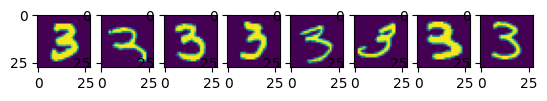

In [123]:
plot(3)

In [124]:
import matplotlib.pyplot as plt
import pandas as ps
import numpy as np
import tensorflow as tf


In [154]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [126]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [128]:
#normalization onehot emcoding

In [129]:
x_train=x_train/255

In [164]:
y_train=pd.get_dummies(y_train)

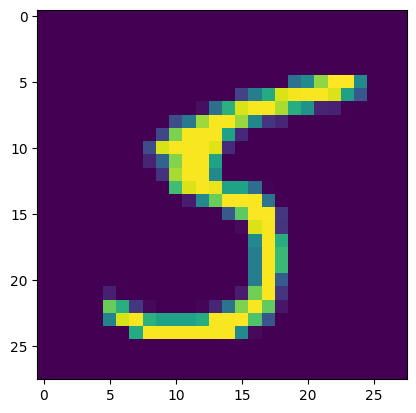

In [157]:
plt.imshow(x_train[59997])

In [143]:
np.where(y_train[0]==1)[0]

array([    1,    21,    34, ..., 59952, 59972, 59987])

In [166]:
y_train.iloc[59997]

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: 59997, dtype: uint8

In [165]:
y_train

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [168]:
#modeling

(28, 28)

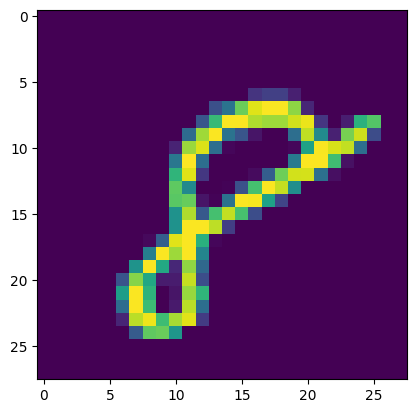

In [180]:
plt.imshow(x_train[59999])
x_train[59999].shape

In [183]:
x_train[0:1].shape

(1, 28, 28)

In [184]:
#The shape (1, 28, 28) indicates  3d image , 1 represents clor channel grayscale,The second and third dimensions (28, 28) represent the height and width of the image, re|spectively.

In [ ]:
#input--image is i/p --28*28=784
#hidden--hyperparameter,go for 2 power n neurons ex:2,4,8,128,512,1024
#output--10 neurons

In [185]:
#sequential
#functional--for skip connection

In [204]:
model=tf.keras.models.Sequential()

In [188]:
#since 784 i/p neaurons are there and we have 28*28 2d image we need to flatten and seperate 28 columns and pass vertically

In [205]:
model.add(tf.keras.layers.Input((28,28),name="Input"))

In [206]:
model.add(tf.keras.layers.Flatten(name="Flatten"))

In [207]:
model.add(tf.keras.layers.Dense(512,activation='relu',name='Hidden'))

In [200]:
?tf.keras.layers.Dense

In [208]:
model.add(tf.keras.layers.Dense(10,activation='softmax',name='output'))

In [209]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Hidden (Dense)              (None, 512)               401920    
                                                                 
 output (Dense)              (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [210]:
#(None, 784) means The None in the first dimension means that the input size in that dimension can vary or be flexible. During training or inference, this dimension will be determined by the batch size.

In [212]:
#401920=784*512+512
#5130=512*10+10